In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [2]:
df =pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [22]:
A=df.iloc[:,-1] # Imputing Classes Column
A.replace(to_replace=['not fire','fire'], value=[0,1],inplace=True,regex=True)
A_1=pd.DataFrame(A)

A_1


,Classes
0,0
1,0
2,0
3,0
4,0
...,...
239,1
240,0
241,0
242,0


In [23]:
y=df.iloc[:,3] # Selecting Target column which is temperature


In [25]:
X_1=df[[' RH', ' Ws', 'Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]
X=pd.concat([X_1,A_1], axis=1) # axis=1 implies horizontal concatenation
df_final=X
df_final

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [26]:
df_final.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
RH,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023
Ws,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529
Rain,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449
FFMC,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114
DMC,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188
DC,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122
ISI,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.736142
BUI,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.584545
FWI,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.719407
Classes,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.507122,0.736142,0.584545,0.719407,1.000000


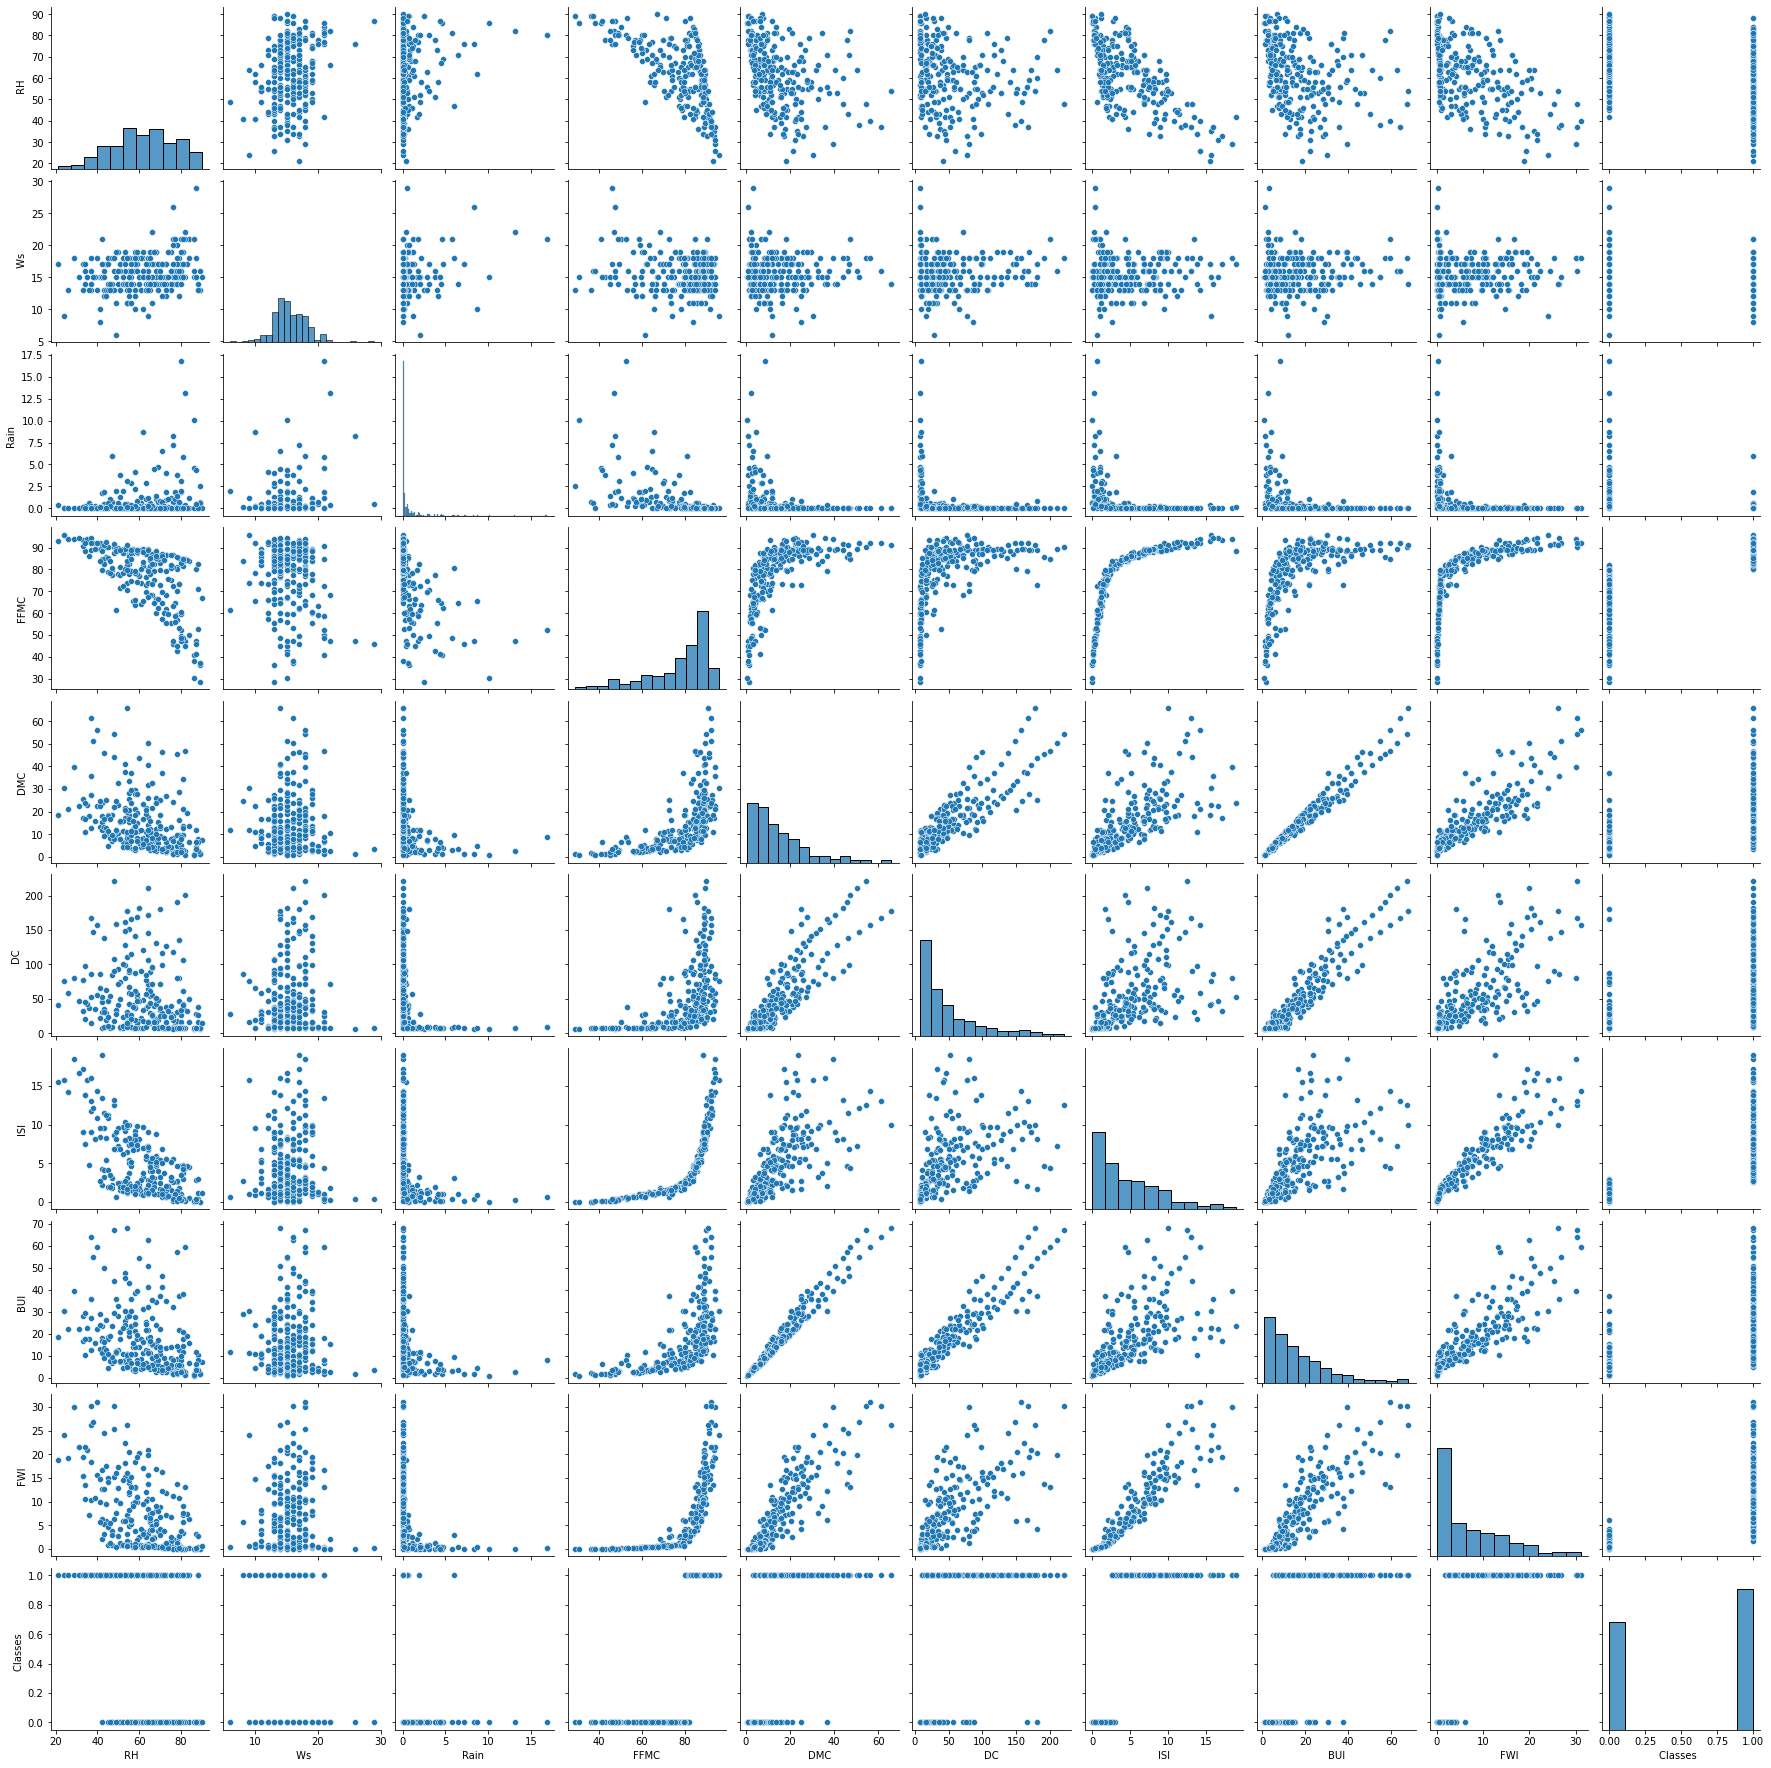

In [27]:
import seaborn as sns
sns.pairplot(df_final)

<AxesSubplot:>

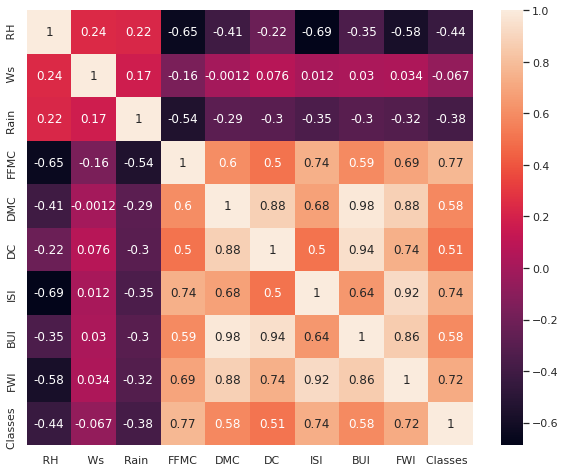

In [28]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_final.corr(),annot=True)

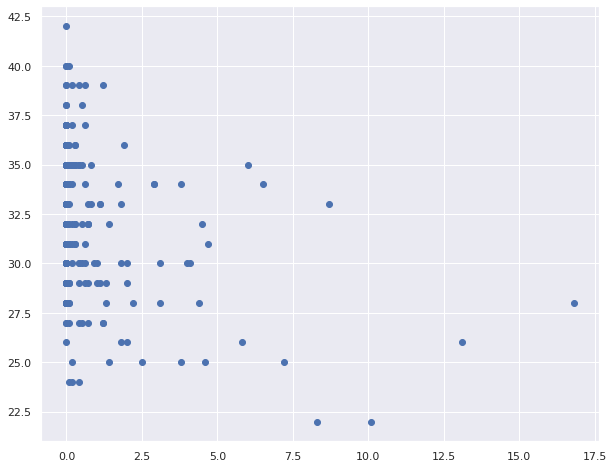

In [30]:
plt.scatter(df_final.iloc[:,2],y) # Comparing Rain and Temperature

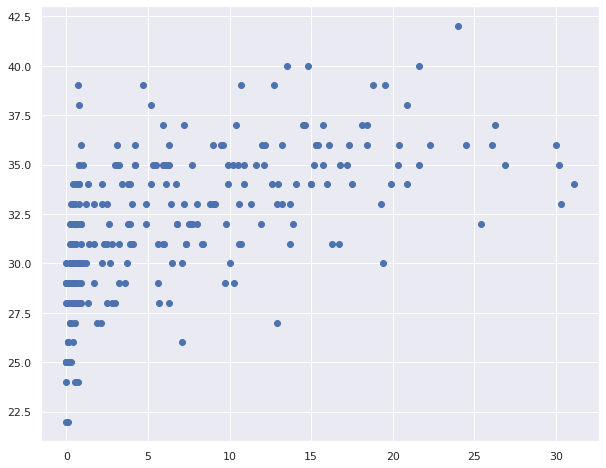

In [31]:
plt.scatter(df_final.iloc[:,-2],y) # Comparing Fire Weather Index and Temprature,High linear realtionship is observed

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

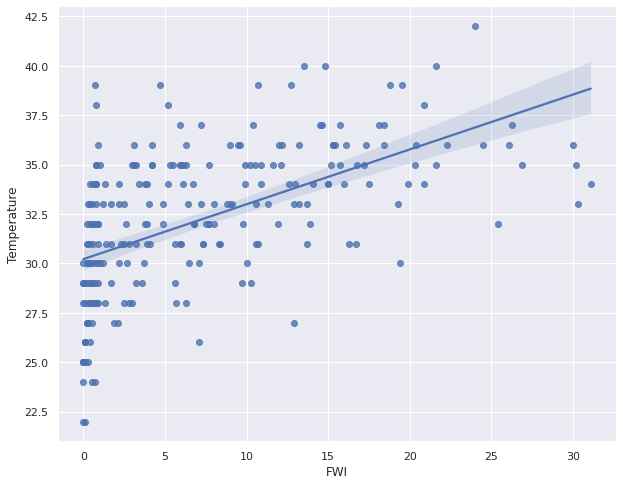

In [32]:
sns.regplot(x='FWI',y=y,data=df_final) # Shaded region refers to Ridge and Lasso possibilty

<AxesSubplot:xlabel='Rain ', ylabel='Temperature'>

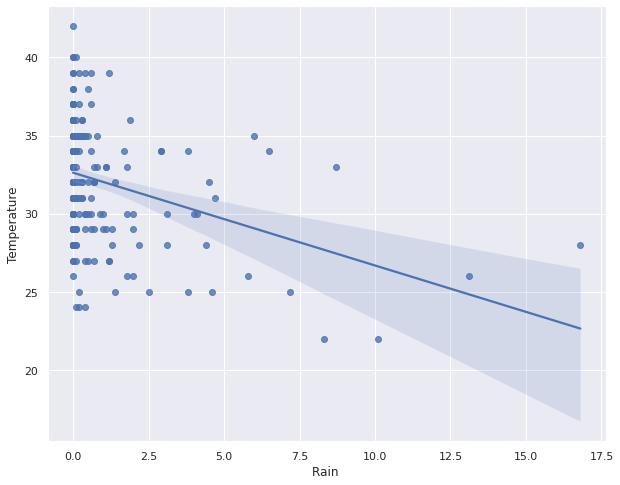

In [33]:
sns.regplot(x=df_final.iloc[:,2],y=y,data=df_final) # Rain and Temperature are inversely related

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.33, random_state=10)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32636097,
        -0.86597829, -1.06992376],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76499972,
         1.21371864,  0.93464604],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35224151,
         0.48516239,  0.93464604],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08639724,
         0.37919057,  0.93464604],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76710278,
        -0.78649943, -1.06992376],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27738965,
        -0.7997459 , -1.06992376]])

In [36]:
X_test=scaler.transform(X_test)
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21325921e-01,
        -7.33709998e-01, -6.83151962e-01, -8.12992382e-01,
        -1.06992376e+00],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03374779e+00,
         5.03148781e-01,  1.72343828e+00,  1.16073273e+00,
         9.34646039e-01],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06652268e-01,
        -6.38567015e-01, -8.30065901e-01, -7.99745905e-01,
        -1.06992376e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10844740e-01,
        -7.09924252e-01, -7.74098686e-01, -8.12992382e-01,
        -1.06992376e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74386276e-01,
         5.26934527e-01,  9.33931438e-02,  3.92437047e-01,
         9.

In [37]:
## Model training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
## Print the coefficients
print(regression.coef_)

[-1.32790585 -0.5301597  -0.23556985  0.93050615  0.39788337  0.67895964
 -0.02500347 -0.7249273   0.12500563  0.20253611]


In [38]:
print(regression.intercept_)

32.17791411042945


In [39]:
## Prediction for test data
reg_pred=regression.predict(X_test)
reg_pred

array([31.62551457, 33.38307273, 33.53704145, 31.75214087, 33.11433219,
       34.86422594, 33.80289067, 33.92075762, 32.19754763, 33.13696038,
       33.70172888, 27.79459827, 35.45625395, 29.31795565, 32.12497274,
       31.95963037, 34.16570216, 28.2499872 , 35.95141213, 34.38786575,
       32.9215294 , 33.88771205, 33.7690671 , 32.87133007, 35.66908627,
       28.64148169, 32.56298277, 33.1167435 , 27.78199011, 32.21094323,
       26.18235733, 26.9565342 , 34.15641413, 31.89207157, 33.05528554,
       30.48196592, 28.97632919, 32.6205333 , 27.87003137, 35.50126598,
       32.64576555, 34.08749537, 33.84187107, 31.27533256, 36.43348732,
       34.22540008, 24.72392722, 35.03204053, 33.84000989, 29.52143983,
       31.36254019, 32.62690117, 35.67652206, 32.35518042, 30.39363386,
       30.24986325, 32.79792533, 36.11945305, 31.16079765, 33.51632867,
       32.56584454, 32.76590736, 31.18244159, 24.65410042, 31.57208304,
       36.02175732, 29.30104034, 29.94038339, 34.92336677, 33.63

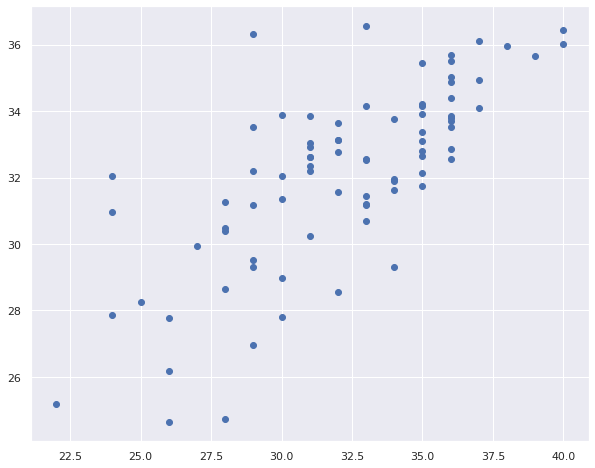

In [40]:
## Assumption pf Linear Regression
plt.scatter(y_test,reg_pred) #Test and predicted are linear

In [41]:
# Second Assumption
#Residual should be coming like normal distribution
residuals=y_test-reg_pred
residuals

162    2.374485
60     1.616927
61     2.462959
63     3.247859
69     1.885668
         ...   
169    0.469277
232   -7.324593
144    1.555534
208   -3.557856
105   -3.190984
Name: Temperature, Length: 81, dtype: float64

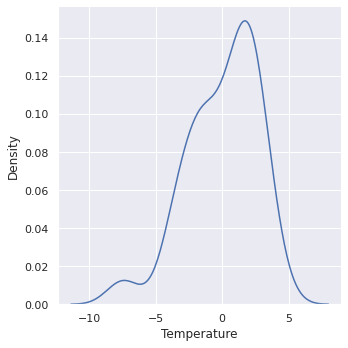

In [42]:
sns.displot(residuals,kind='kde')

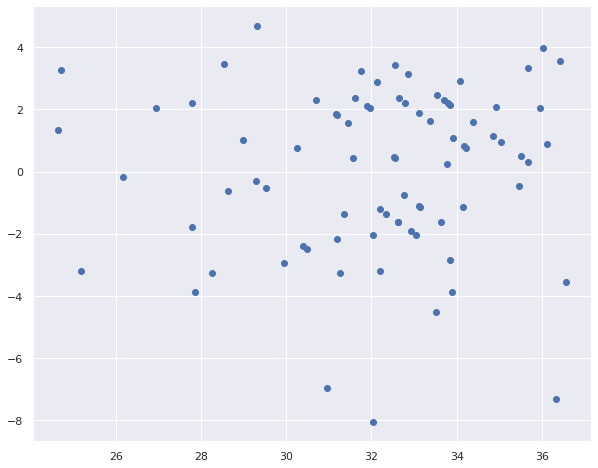

In [43]:
## Scatter plot with predictions and residual
## Uniform distribution no particular shape
plt.scatter(reg_pred,residuals)

In [44]:
#Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.014173601943042
2.186043637934886
2.648428515543329


In [45]:
## R squared and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.5361729423859753

In [46]:
# adjusted R squared
adj_r=1 - (1-score)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
adj_r

0.5162662017158455

In [47]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

In [48]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [49]:
reg_pred_ridge=ridge.predict(X_test)
reg_pred_ridge

array([31.62635722, 33.38740659, 33.53521968, 31.75173416, 33.11348322,
       34.86924963, 33.80019649, 33.91469548, 32.19633652, 33.1350523 ,
       33.69597486, 27.79405067, 35.45118553, 29.31563764, 32.12473519,
       31.95771429, 34.16308059, 28.25205618, 35.95435966, 34.3850715 ,
       32.92134582, 33.88365232, 33.76906503, 32.86911298, 35.67237595,
       28.64327329, 32.55498573, 33.11842097, 27.78279642, 32.21739322,
       26.18073805, 26.95797759, 34.15379856, 31.89353339, 33.05566692,
       30.48070318, 28.97490024, 32.61756942, 27.87083793, 35.50207972,
       32.64725747, 34.08201396, 33.84468384, 31.27223813, 36.4303065 ,
       34.22500351, 24.72561301, 35.03399297, 33.83828213, 29.52037933,
       31.3610985 , 32.62609365, 35.67507985, 32.35313319, 30.39340569,
       30.24628209, 32.80156466, 36.12030943, 31.16333484, 33.51391983,
       32.56647344, 32.77042331, 31.18173806, 24.65067962, 31.57493973,
       36.02318141, 29.29983322, 29.94089478, 34.92470659, 33.62

In [50]:
print(mean_squared_error(y_test,reg_pred_ridge))
print(mean_absolute_error(y_test,reg_pred_ridge))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.013779887614123
2.1857803168033376
2.648428515543329


In [51]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,reg_pred_ridge)
score1

0.5361989775782996

In [52]:
adj_r=1 - (1-score1)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
adj_r

0.5162933542983983

In [53]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.75)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.75)

In [54]:
lasso_reg=lasso_reg.predict(X_test)
lasso_reg

array([32.32893952, 32.75449238, 33.25025988, 32.05362974, 33.05746824,
       33.55415125, 33.53268157, 32.88859132, 32.09320853, 32.79791181,
       33.33801426, 29.95003701, 34.56519096, 30.7258258 , 33.27792596,
       32.32221839, 33.08133832, 28.92616908, 34.90106912, 33.75597513,
       32.50353276, 33.17912973, 33.51836846, 32.91289683, 35.00937766,
       29.79350823, 32.42673094, 33.04175953, 28.98246138, 31.75968611,
       29.01060754, 27.95619305, 33.40338344, 32.81082934, 32.71870959,
       31.73682085, 29.86987462, 32.5908517 , 28.68808233, 33.90006645,
       32.60228433, 33.42437304, 34.26793142, 31.76160644, 34.42585578,
       33.3957468 , 29.34744586, 34.11668353, 33.41005992, 30.20954878,
       31.50253009, 32.39474414, 34.25313822, 32.25209305, 31.35651844,
       31.09081027, 32.31698216, 34.69256876, 31.78168052, 33.72067241,
       32.28167945, 32.1919601 , 31.29599471, 28.84552661, 32.26261018,
       34.92301887, 30.91137158, 31.27928119, 33.55415125, 33.20

In [55]:
print(mean_squared_error(y_test,lasso_reg))
print(mean_absolute_error(y_test,lasso_reg))
print(np.sqrt(mean_squared_error(y_test,lasso_reg)))

8.400696647384011
2.392713077153916
2.8983955298378468


In [56]:
from sklearn.metrics import r2_score
score2=r2_score(y_test,lasso_reg)
score2

0.4444861748524813